In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from history import plot_history, save_history, add_history, load_history

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
from reviews import retrieve_data, split_features_labels

train_dataset, test_dataset = retrieve_data()

train_features , train_labels = split_features_labels(train_dataset)
test_features, test_labels = split_features_labels(test_dataset)

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [9]:
from reviews import wrangle_data

word_dimension = 3000 # about 95% fluency

# oov == out of value token
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=word_dimension, oov_token='~~~')
tokenizer.fit_on_texts(train_features)

sequence_length = 100
train_data, train_labels, train_tokens = wrangle_data(tokenizer, train_features, train_labels, sequence_length)
test_data, test_labels, test_tokens = wrangle_data(tokenizer, test_features, test_labels, sequence_length)

In [3]:
# Load history
history_dir = 'models'

dnn_model_stub = 'reviews-dnn-6-0.8158'
cnn_model_stub = 'reviews-cnn-6-0.8149'
gru_model_stub = 'reviews-gru-6-0.8131'
lstm_model_stub = 'reviews-lstm-6-0.8088'
bidirectional_dnn = 'reviews-bidirectional-5-0.8122'

history_dnn = load_history(f"{history_dir}/{dnn_model_stub}", model_format='.tf')
dnn = history_dnn.model

history_cnn = load_history(f"{history_dir}/{cnn_model_stub}", model_format='.tf')
cnn = history_cnn.model

history_gru = load_history(f"{history_dir}/{gru_model_stub}", model_format='.tf')
gru = history_gru.model

history_lstm = load_history(f"{history_dir}/{lstm_model_stub}", model_format='.tf')
lstm = history_lstm.model

history_bidirectional = load_history(f"{history_dir}/{bidirectional_dnn}", model_format='.tf')
bidirectional = history_bidirectional.model

In [4]:
dnn_embedding_layer = dnn.layers[0]

In [7]:
test_features[100]

'imagine every stereotypical, overacted cliche from every movie and tv show set on the streets of brooklyn between 1930 and 1980. populate it with a cast of interchangeable caricatures instead of actual characters. throw in a mix of "period" music and wailing electric guitars during the "rumble" scenes. then pass the time trying to figure out (or care) which of the deuces is going to be killed in the (anti)climactic final rumble.<br /><br />i\'ll give this movie points for not being just another romantic comedy, teen slasher, explosive action movie, teen sex comedy, kiddie musical, or oscar-nomination vehicle. but bringing something new or interesting to the street-gang tragedy genre might\'ve been nice.'

In [14]:
dnn_imagine_embedding_for_token = dnn_embedding_layer(test_data[100])[0]

In [15]:
dnn_imagine_embedding_for_token

NameError: name 'dnn_imagigne_embedding_for_token' is not defined

In [16]:
dnn_imagine_token = test_data[100][0]

In [17]:
dnn_imagine_token

837

In [18]:
test_tokens[100][0]

837

Bidirectional Model

In [19]:
bidirectional_embedding_layer = bidirectional.layers[0]

In [20]:
bidirectional_imagine_embedding_for_token = bidirectional_embedding_layer(test_data[100])[0]

In [21]:
bidirectional_imagine_embedding_for_token

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.0065395 ,  0.07271989,  0.00835155, -0.07150826, -0.02583727,
       -0.00563258,  0.03141293, -0.03131361,  0.06952843, -0.01377815,
        0.04861365,  0.07185432, -0.05512912, -0.00597636, -0.07220015,
        0.00162761,  0.02081128,  0.03597562, -0.06571402,  0.02530865,
       -0.07276395, -0.01228362,  0.01053862,  0.01578127, -0.06266531,
        0.00437192, -0.05930907,  0.03058906, -0.05402234,  0.04449673,
       -0.05980469, -0.0304007 ], dtype=float32)>

In [ ]:
bidirectional_imagine_token = test_data[100][0]

# Tranfer Learning

In [22]:
dnn_embedding_layer.trainable = False
bidirectional_embedding_layer.trainable = False


In [27]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D

dnn_transfer = tf.keras.Sequential([
    dnn_embedding_layer,
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
bidirectional_transfer = tf.keras.Sequential([
    bidirectional_embedding_layer,
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
from reviews import compile_model
dnn_transfer.build(input_shape=(None, sequence_length))
dnn_transfer = compile_model(dnn_transfer)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_3 (ModuleWr  (None, 100, 32)           96000     
 apper)                                                          
                                                                 
 global_average_pooling1d_3  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97089 (379.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 96000 (375.00 KB)
_________________________________________________________________
None


In [35]:
bidirectional_transfer.build(input_shape=(None, sequence_length))
bidirectional_transfer = compile_model(bidirectional_transfer)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_4 (ModuleWr  (None, 100, 32)           96000     
 apper)                                                          
                                                                 
 global_average_pooling1d_4  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97089 (379.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 96000 (375.00 KB)
_________________________________________________________________
None


In [36]:
dnn_transfer_history = dnn_transfer.fit(train_data, train_labels, batch_size=64, validation_split=0.1, epochs=5) 

Epoch 1/5
352/352 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.8458 - val_loss: 0.4367 - val_accuracy: 0.8092
Epoch 2/5
352/352 [==============================] - 0s 782us/step - loss: 0.3378 - accuracy: 0.8672 - val_loss: 0.4115 - val_accuracy: 0.8120
Epoch 3/5
352/352 [==============================] - 0s 701us/step - loss: 0.3140 - accuracy: 0.8679 - val_loss: 0.4196 - val_accuracy: 0.8100
Epoch 4/5
352/352 [==============================] - 0s 692us/step - loss: 0.3122 - accuracy: 0.8673 - val_loss: 0.4240 - val_accuracy: 0.8124
Epoch 5/5
352/352 [==============================] - 0s 947us/step - loss: 0.3120 - accuracy: 0.8672 - val_loss: 0.4245 - val_accuracy: 0.8132


In [37]:
bidirectional_transfer_history = bidirectional_transfer.fit(train_data, train_labels, batch_size=64, validation_split=0.1, epochs=5)

Epoch 1/5
352/352 [==============================] - 1s 1ms/step - loss: 0.6234 - accuracy: 0.8272 - val_loss: 0.5421 - val_accuracy: 0.8008
Epoch 2/5
352/352 [==============================] - 0s 857us/step - loss: 0.4332 - accuracy: 0.8680 - val_loss: 0.4329 - val_accuracy: 0.8040
Epoch 3/5
352/352 [==============================] - 0s 727us/step - loss: 0.3501 - accuracy: 0.8698 - val_loss: 0.4162 - val_accuracy: 0.8028
Epoch 4/5
352/352 [==============================] - 0s 695us/step - loss: 0.3273 - accuracy: 0.8702 - val_loss: 0.4194 - val_accuracy: 0.8048
Epoch 5/5
352/352 [==============================] - 0s 896us/step - loss: 0.3212 - accuracy: 0.8704 - val_loss: 0.4244 - val_accuracy: 0.8040


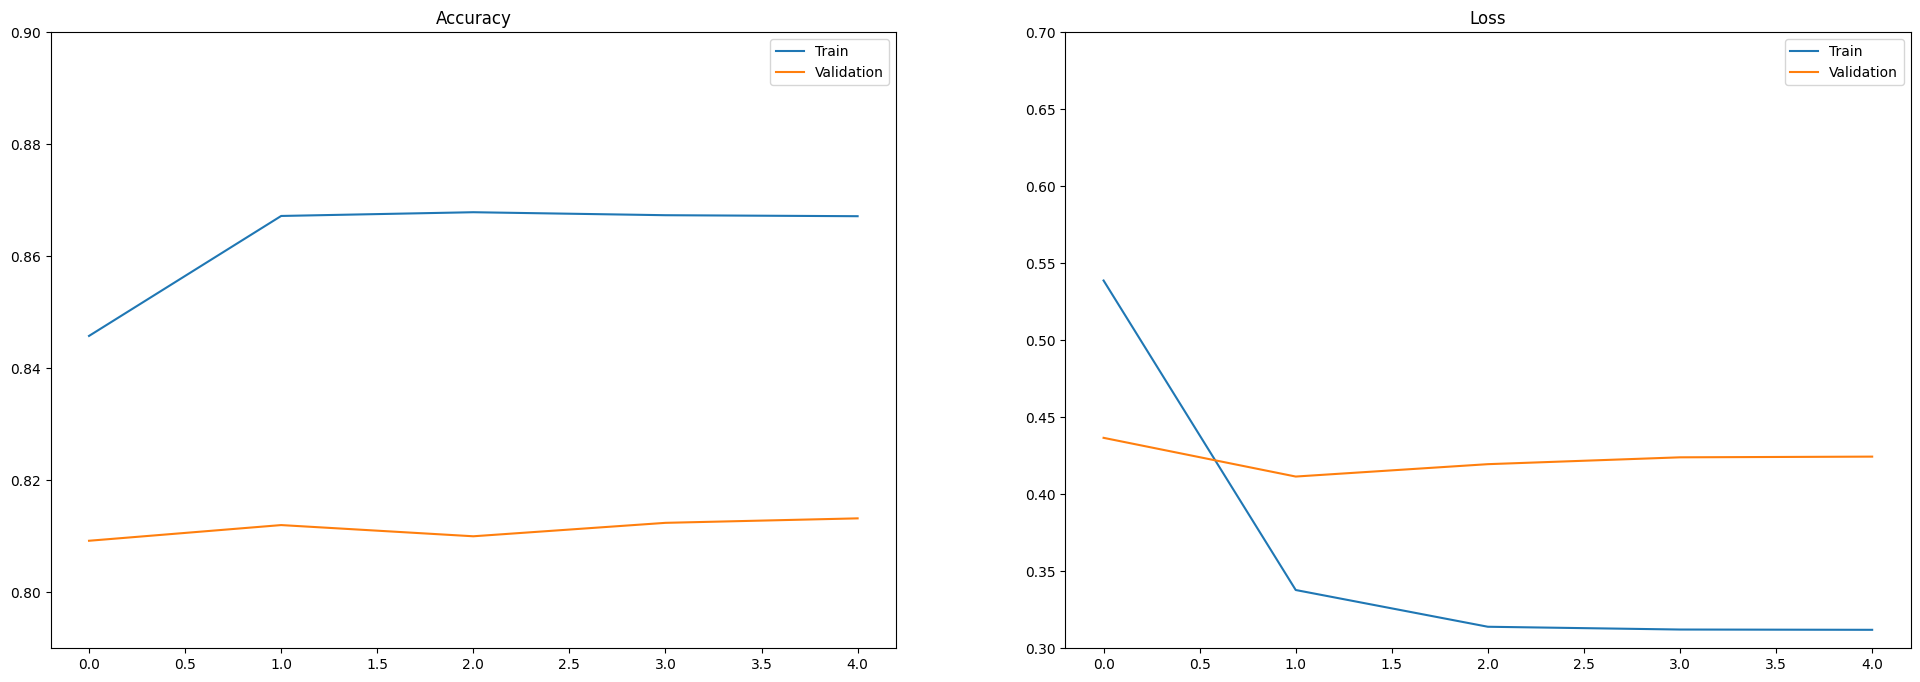

In [53]:
from history import plot_history
y_limits = {"accuracy": [0.79, .9],
            "loss": [0.3, 0.7]
            }

plot_history(dnn_transfer_history, y_limits=y_limits)

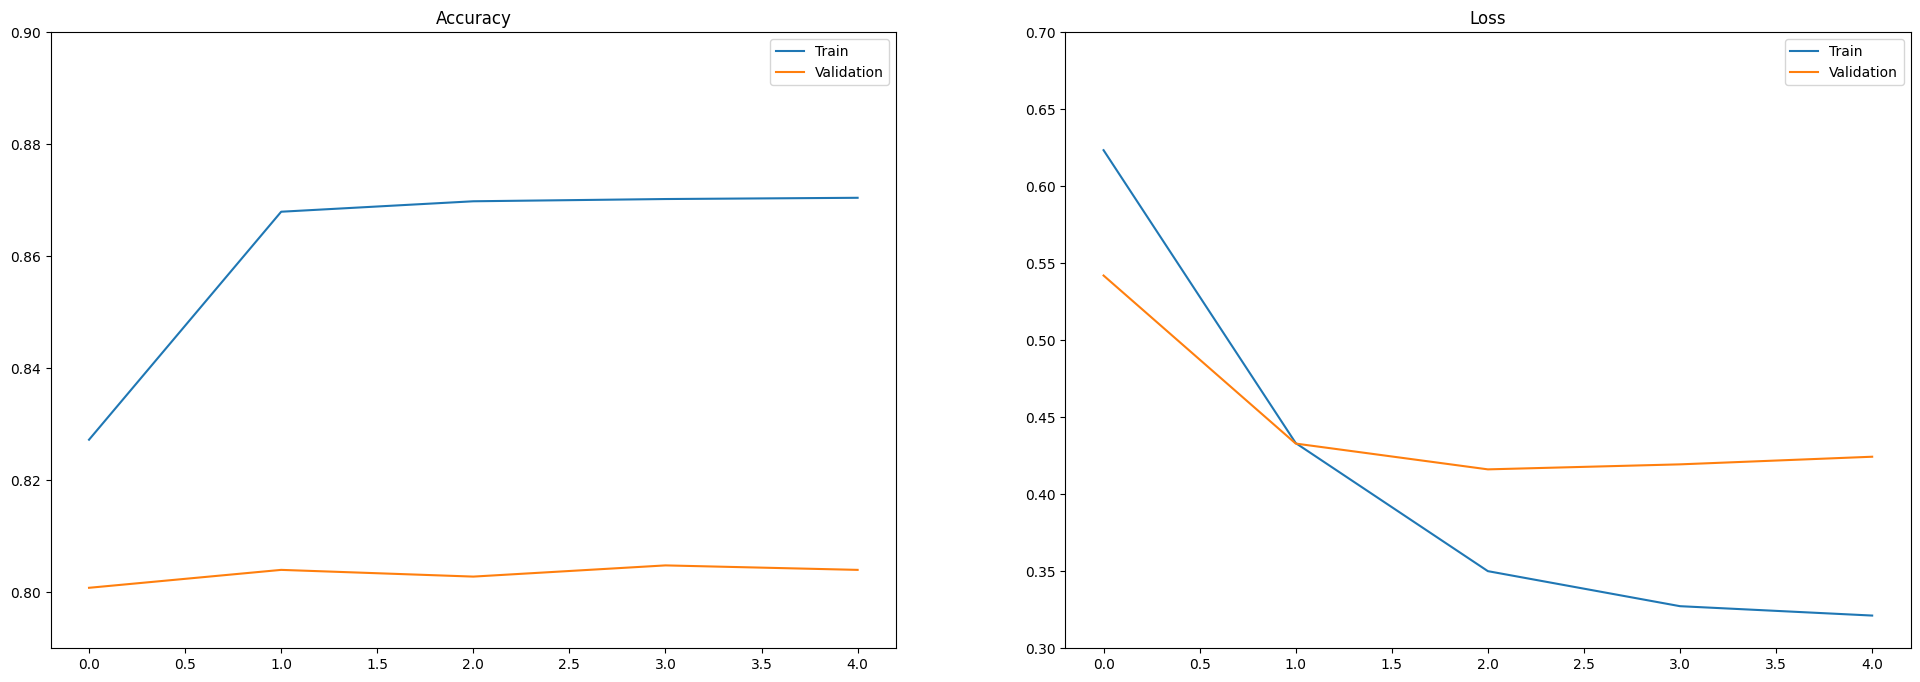

In [54]:
plot_history(bidirectional_transfer_history, y_limits=y_limits)

## Evaluate on Test Data

In [55]:
dnn_transfer.evaluate(test_data, test_labels)

782/782 [==============================] - 0s 601us/step - loss: 0.4135 - accuracy: 0.8144


[0.41351836919784546, 0.8144000172615051]

In [56]:
bidirectional_transfer.evaluate(test_data, test_labels)

782/782 [==============================] - 0s 589us/step - loss: 0.4152 - accuracy: 0.8122


[0.4152210056781769, 0.8122400045394897]